In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = np.load('neutrino0523n1000000.npz')

In [3]:
# Splitting 
n = 10000

cpv = data['cpv'][:n]

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]


ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

ve2_dune = np.hstack((ve_dune,vebar_dune))[:n] #合併ve和ve_bar
ve2_t2hk = np.hstack((ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar
ve4 = np.hstack((ve_dune,vebar_dune,ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar


from sklearn.model_selection import train_test_split
ve_dune_train, ve_dune_test, cpv_train_ve_dune, cpv_test_ve_dune = train_test_split(ve_dune, cpv, test_size=0.10, random_state=32)
vu_dune_train, vu_dune_test, cpv_train_vu_dune, cpv_test_vu_dune = train_test_split(vu_dune, cpv, test_size=0.10, random_state=32)
vebar_dune_train, vebar_dune_test, cpv_train_vebar_dune, cpv_test_vebar_dune = train_test_split(vebar_dune, cpv, test_size=0.10, random_state=32)
vubar_dune_train, vubar_dune_test, cpv_train_vubar_dune, cpv_test_vubar_dune = train_test_split(vubar_dune, cpv, test_size=0.10, random_state=32)


ve_t2hk_train, ve_t2hk_test, cpv_train_ve_t2hk, cpv_test_ve_t2hk = train_test_split(ve_t2hk, cpv, test_size=0.10, random_state=32)
vu_t2hk_train, vu_t2hk_test, cpv_train_vu_t2hk, cpv_test_vu_t2hk = train_test_split(vu_t2hk, cpv, test_size=0.10, random_state=32)
vebar_t2hk_train, vebar_t2hk_test, cpv_train_vebar_t2hk, cpv_test_vebar_t2hk = train_test_split(vebar_t2hk, cpv, test_size=0.10, random_state=32)
vubar_t2hk_train, vubar_t2hk_test, cpv_train_vubar_t2hk, cpv_test_vubar_t2hk = train_test_split(vubar_t2hk, cpv, test_size=0.10, random_state=32)

ve2_dune_train, ve2_dune_test, cpv_train_ve2_dune, cpv_test_ve2_dune = train_test_split(ve2_dune, cpv, test_size=0.10, random_state=32)
ve2_t2hk_train, ve2_t2hk_test, cpv_train_ve2_t2hk, cpv_test_ve2_t2hk = train_test_split(ve2_t2hk, cpv, test_size=0.10, random_state=32)
ve4_train, ve4_test, cpv_train_ve4, cpv_test_ve4 = train_test_split(ve4, cpv, test_size=0.10, random_state=32)



Training Score:  0.9605555555555556
Testing Score:  0.956


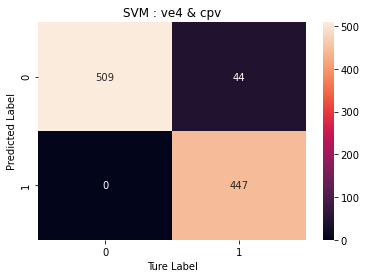

In [4]:
# SVM : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve4 & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

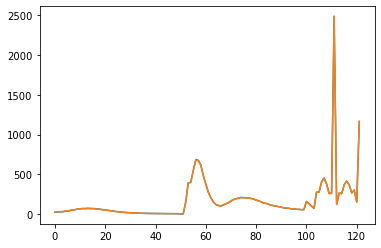

In [76]:
#加總平均cpv=0/1的spectrum 看兩者平均差異 
tmp0 = np.zeros(122)
for i in range(len(ve4_test[cpv_pred_svm==0])):
    tmp0 = tmp0 + ve4_test[cpv_pred_svm==0][i]
ve4_test_avgCPV_0 = tmp0/len(ve4_test[cpv_pred_svm==0])

tmp1 = np.zeros(122)
for i in range(len(ve4_test[cpv_pred_svm==1])):
    tmp1 = tmp1 + ve4_test[cpv_pred_svm==1][i]
ve4_test_avgCPV_1 = tmp1/len(ve4_test[cpv_pred_svm==1])

plt.plot(range(len(ve4_test_avgCPV_0)),ve4_test_avgCPV_0)
plt.plot(range(len(ve4_test_avgCPV_1)),ve4_test_avgCPV_1)

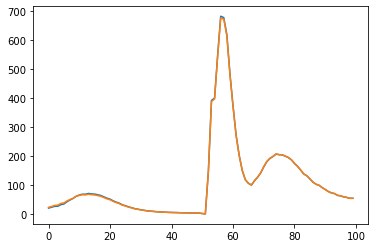

In [79]:
plt.plot(range(len(ve4_test_avgCPV_0[:100])),ve4_test_avgCPV_0[:100])
plt.plot(range(len(ve4_test_avgCPV_1[:100])),ve4_test_avgCPV_1[:100])

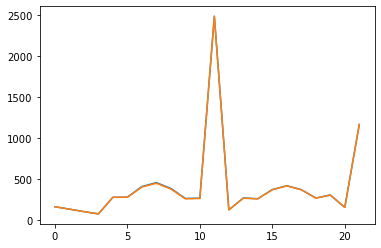

In [80]:
plt.plot(range(len(ve4_test_avgCPV_0[100:])),ve4_test_avgCPV_0[100:])
plt.plot(range(len(ve4_test_avgCPV_1[100:])),ve4_test_avgCPV_1[100:])

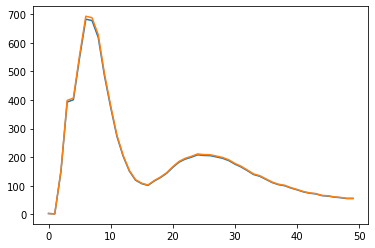

In [72]:
#加總平均cpv=0/1的spectrum 看兩者平均差異 
tmp0 = np.zeros(50)
for i in range(len(vebar_dune[cpv==0])):
    tmp0 = tmp0 + vebar_dune[cpv==0][i]
vebar_dune_avgCPV_0 = tmp0/len(vebar_dune[cpv==0])

tmp1 = np.zeros(50)
for i in range(len(vebar_dune[cpv==1])):
    tmp1 = tmp1 + vebar_dune[cpv==1][i]
vebar_dune_avgCPV_1 = tmp0/len(vebar_dune[cpv==1])

plt.plot(range(len(vebar_dune_avgCPV_0)),vebar_dune_avgCPV_0)
plt.plot(range(len(vebar_dune_avgCPV_1)),vebar_dune_avgCPV_1)